# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 509 kB 14.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 12.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 15.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 439 kB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [9]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['acess_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [10]:
client = MongoClient(mongod_connect)
db = client.gp21 # use or create a database named demo
tweet_collection = db.lab11 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [11]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [12]:
count = 100 #number of returned tweets, default and max is 100
geocode = "37.5247764,-77.5633011,150mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [13]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Tue Nov 17 21:41:51 +0000 2020'
'Tue Nov 17 21:41:45 +0000 2020'
'Tue Nov 17 21:41:27 +0000 2020'
'Tue Nov 17 21:41:27 +0000 2020'
'Tue Nov 17 21:41:23 +0000 2020'
'Tue Nov 17 21:41:10 +0000 2020'
'Tue Nov 17 21:41:08 +0000 2020'
'Tue Nov 17 21:41:05 +0000 2020'
'Tue Nov 17 21:41:04 +0000 2020'
'Tue Nov 17 21:40:59 +0000 2020'
'Tue Nov 17 21:40:35 +0000 2020'
'Tue Nov 17 21:40:32 +0000 2020'
'Tue Nov 17 21:40:19 +0000 2020'
'Tue Nov 17 21:40:09 +0000 2020'
'Tue Nov 17 21:40:04 +0000 2020'
'Tue Nov 17 21:39:58 +0000 2020'
'Tue Nov 17 21:39:42 +0000 2020'
'Tue Nov 17 21:39:40 +0000 2020'
'Tue Nov 17 21:39:30 +0000 2020'
'Tue Nov 17 21:39:20 +0000 2020'
'Tue Nov 17 21:39:19 +0000 2020'
'Tue Nov 17 21:39:19 +0000 2020'
'Tue Nov 17 21:39:06 +0000 2020'
'Tue Nov 17 21:39:00 +0000 2020'
'Tue Nov 17 21:38:55 +0000 2020'
'Tue Nov 17 21:38:53 +0000 2020'
'Tue Nov 17 21:38:43 +0000 2020'
'Tue Nov 17 21:38:10 +0000 2020'
'Tue Nov 17 21:37:55 +0000 2020'
'Tue Nov 17 21:37:44 +0000 2020'
'Tue Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [16]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Tue Nov 17 13:54:21 +0000 2020'
'Tue Nov 17 13:54:15 +0000 2020'
'Tue Nov 17 13:54:09 +0000 2020'
'Tue Nov 17 13:53:59 +0000 2020'
'Tue Nov 17 13:53:57 +0000 2020'
'Tue Nov 17 13:53:35 +0000 2020'
'Tue Nov 17 13:53:28 +0000 2020'
'Tue Nov 17 13:53:03 +0000 2020'
'Tue Nov 17 13:52:59 +0000 2020'
'Tue Nov 17 13:52:49 +0000 2020'
'Tue Nov 17 13:52:48 +0000 2020'
'Tue Nov 17 13:52:43 +0000 2020'
'Tue Nov 17 13:52:37 +0000 2020'
'Tue Nov 17 13:52:14 +0000 2020'
'Tue Nov 17 13:52:14 +0000 2020'
'Tue Nov 17 13:51:51 +0000 2020'
'Tue Nov 17 13:51:38 +0000 2020'
'Tue Nov 17 13:51:22 +0000 2020'
'Tue Nov 17 13:51:16 +0000 2020'
'Tue Nov 17 13:51:13 +0000 2020'
'Tue Nov 17 13:51:11 +0000 2020'
'Tue Nov 17 13:50:57 +0000 2020'
'Tue Nov 17 13:50:41 +0000 2020'
'Tue Nov 17 13:50:32 +0000 2020'
'Tue Nov 17 13:50:29 +0000 2020'
'Tue Nov 17 13:50:18 +0000 2020'
'Tue Nov 17 13:50:09 +0000 2020'
'Tue Nov 17 13:50:06 +0000 2020'
'Tue Nov 17 13:50:01 +0000 2020'
'Tue Nov 17 13:49:56 +0000 2020'
'Tue Nov 1

'Tue Nov 17 13:00:57 +0000 2020'
'Tue Nov 17 13:00:39 +0000 2020'
'Tue Nov 17 13:00:22 +0000 2020'
'Tue Nov 17 13:00:08 +0000 2020'
'Tue Nov 17 13:00:05 +0000 2020'
'Tue Nov 17 13:00:01 +0000 2020'
'Tue Nov 17 13:00:00 +0000 2020'
'Tue Nov 17 12:59:45 +0000 2020'
'Tue Nov 17 12:59:42 +0000 2020'
'Tue Nov 17 12:59:20 +0000 2020'
'Tue Nov 17 12:58:55 +0000 2020'
'Tue Nov 17 12:58:50 +0000 2020'
'Tue Nov 17 12:58:38 +0000 2020'
'Tue Nov 17 12:58:35 +0000 2020'
'Tue Nov 17 12:58:23 +0000 2020'
'Tue Nov 17 12:58:22 +0000 2020'
'Tue Nov 17 12:57:52 +0000 2020'
'Tue Nov 17 12:57:01 +0000 2020'
'Tue Nov 17 12:56:55 +0000 2020'
'Tue Nov 17 12:56:49 +0000 2020'
'Tue Nov 17 12:56:26 +0000 2020'
'Tue Nov 17 12:56:23 +0000 2020'
'Tue Nov 17 12:56:12 +0000 2020'
'Tue Nov 17 12:56:06 +0000 2020'
'Tue Nov 17 12:55:48 +0000 2020'
'Tue Nov 17 12:55:06 +0000 2020'
'Tue Nov 17 12:54:55 +0000 2020'
'Tue Nov 17 12:54:54 +0000 2020'
'Tue Nov 17 12:54:54 +0000 2020'
'Tue Nov 17 12:54:51 +0000 2020'
'Tue Nov 1

'Tue Nov 17 11:37:09 +0000 2020'
'Tue Nov 17 11:37:04 +0000 2020'
'Tue Nov 17 11:37:02 +0000 2020'
'Tue Nov 17 11:36:17 +0000 2020'
'Tue Nov 17 11:35:50 +0000 2020'
'Tue Nov 17 11:35:14 +0000 2020'
'Tue Nov 17 11:35:03 +0000 2020'
'Tue Nov 17 11:34:59 +0000 2020'
'Tue Nov 17 11:34:36 +0000 2020'
'Tue Nov 17 11:33:37 +0000 2020'
'Tue Nov 17 11:33:32 +0000 2020'
'Tue Nov 17 11:32:02 +0000 2020'
'Tue Nov 17 11:30:45 +0000 2020'
'Tue Nov 17 11:30:14 +0000 2020'
'Tue Nov 17 11:30:00 +0000 2020'
'Tue Nov 17 11:29:59 +0000 2020'
'Tue Nov 17 11:29:47 +0000 2020'
'Tue Nov 17 11:29:42 +0000 2020'
'Tue Nov 17 11:29:39 +0000 2020'
'Tue Nov 17 11:29:06 +0000 2020'
'Tue Nov 17 11:27:43 +0000 2020'
'Tue Nov 17 11:27:09 +0000 2020'
'Tue Nov 17 11:26:39 +0000 2020'
'Tue Nov 17 11:26:14 +0000 2020'
'Tue Nov 17 11:26:01 +0000 2020'
'Tue Nov 17 11:24:50 +0000 2020'
'Tue Nov 17 11:24:12 +0000 2020'
'Tue Nov 17 11:23:48 +0000 2020'
'Tue Nov 17 11:22:40 +0000 2020'
'Tue Nov 17 11:22:19 +0000 2020'
'Tue Nov 1

'Tue Nov 17 09:12:19 +0000 2020'
'Tue Nov 17 09:11:53 +0000 2020'
'Tue Nov 17 09:11:51 +0000 2020'
'Tue Nov 17 09:11:28 +0000 2020'
'Tue Nov 17 09:11:17 +0000 2020'
'Tue Nov 17 09:10:12 +0000 2020'
'Tue Nov 17 09:09:29 +0000 2020'
'Tue Nov 17 09:08:41 +0000 2020'
'Tue Nov 17 09:08:09 +0000 2020'
'Tue Nov 17 09:06:30 +0000 2020'
'Tue Nov 17 09:06:04 +0000 2020'
'Tue Nov 17 09:06:03 +0000 2020'
'Tue Nov 17 09:06:00 +0000 2020'
'Tue Nov 17 09:05:47 +0000 2020'
'Tue Nov 17 09:04:46 +0000 2020'
'Tue Nov 17 09:04:40 +0000 2020'
'Tue Nov 17 09:04:37 +0000 2020'
'Tue Nov 17 09:04:34 +0000 2020'
'Tue Nov 17 09:03:50 +0000 2020'
'Tue Nov 17 09:03:25 +0000 2020'
'Tue Nov 17 09:03:20 +0000 2020'
'Tue Nov 17 09:03:13 +0000 2020'
'Tue Nov 17 09:03:09 +0000 2020'
'Tue Nov 17 09:02:33 +0000 2020'
'Tue Nov 17 09:02:16 +0000 2020'
'Tue Nov 17 09:02:14 +0000 2020'
'Tue Nov 17 09:02:12 +0000 2020'
'Tue Nov 17 09:02:11 +0000 2020'
'Tue Nov 17 09:02:05 +0000 2020'
'Tue Nov 17 09:01:20 +0000 2020'
'Tue Nov 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [17]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

5431
4361


Create a text index and print the Tweets containing specific keywords. 

In [18]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pprint to display tweets

In [20]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: University of California Health
text: 3/7  31 #COVID19 @UofCAHealth inpatients are on a ventilator.  5 COVID19 inpatients are on extracorporeal membrane… https://t.co/vWZF6N4Vmu
----
name: 🐝#Blacklivesmatter❤
text: Wow! A nurse in ICU said some people who have covid19 and are gravely ill still calling covid19 a hoax!… https://t.co/Rmyv5xzxED
----
name: Ticked2020
text: RT @TraceyTorres: #COVID19
----
name: Sam “ACAB” Batman
text: Happy Bday to COVID19.
----
name: John Loengard
text: @realDonaldTrump COVID19 thanks you
----
name: Erin Snider🆘️ 🇺🇸 🦋🌍🌊
text: @rmc031 @Eliz2Vargas #COVID19 reality. 😒
----
name: 𝕃𝕚𝕡𝕤𝕥𝕚𝕔𝕜 ℙ𝕦𝕟𝕕𝕚𝕥 💋
text: RT @FrankStrovel: #Tennessee #COVID19 #coronavirus
----
name: Dani
text: RT @heykim: 👍🏻@DollyParton #COVID19
----
name: KATHERINE SMITH
text: happy birthday #COVID19  you mean the most to me 🥰
----
name: AB
text: Back to phase 2 for Maryland. #COVID19


In [21]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pandas to display tweets

In [22]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,extended_entities,quoted_status
0,5fb44440e2f8c8718483fd81,Tue Nov 17 17:11:22 +0000 2020,1328747572287004672,1328747572287004672,3/7 31 #COVID19 @UofCAHealth inpatients are o...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.mangotree.com"" rel=""nofoll...",1.328748e+18,...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,5fb44436e2f8c8718483fa82,Tue Nov 17 18:24:39 +0000 2020,1328766012641087488,1328766012641087488,Wow! A nurse in ICU said some people who have ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
2,5fb44446e2f8c8718483fff8,Tue Nov 17 16:07:22 +0000 2020,1328731465060904961,1328731465060904961,RT @TraceyTorres: #COVID19,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,NaN,und,{'created_at': 'Tue Nov 17 06:29:46 +0000 2020...,1.328440e+18,1328439615548776454,NaN,NaN
3,5fb44429e2f8c8718483f5e2,Tue Nov 17 20:10:59 +0000 2020,1328792771134693378,1328792771134693378,Happy Bday to COVID19.,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
4,5fb44421e2f8c8718483f385,Tue Nov 17 21:23:10 +0000 2020,1328810938070425600,1328810938070425600,@realDonaldTrump COVID19 thanks you,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.328802e+18,...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
5,5fb44480e2f8c871848406ba,Tue Nov 17 12:19:14 +0000 2020,1328674051070468096,1328674051070468096,@rmc031 @Eliz2Vargas #COVID19 reality. 😒,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.328403e+18,...,1,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
6,5fb44453e2f8c87184840443,Tue Nov 17 14:24:21 +0000 2020,1328705537781993480,1328705537781993480,RT @FrankStrovel: #Tennessee #COVID19 #coronav...,False,"{'hashtags': [{'text': 'Tennessee', 'indices':...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,NaN,und,{'created_at': 'Tue Nov 17 14:22:12 +0000 2020...,1.328704e+18,1328703866959958017,NaN,NaN
7,5fb4443ce2f8c8718483fc5f,Tue Nov 17 17:37:14 +0000 2020,1328754079942791169,1328754079942791169,RT @heykim: 👍🏻@DollyParton #COVID19,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,NaN,und,{'created_at': 'Tue Nov 17 17:07:20 +0000 2020...,1.328745e+18,1328744764217450502,NaN,NaN
8,5fb44433e2f8c8718483f960,Tue Nov 17 18:53:22 +0000 2020,1328773240072720384,1328773240072720384,happy birthday #COVID19 you mean the most to ...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
9,5fb4442de2f8c8718483f75a,Tue Nov 17 19:35:53 +0000 2020,1328783939310395400,1328783939310395400,Back to phase 2 for Maryland. #COVID19,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN


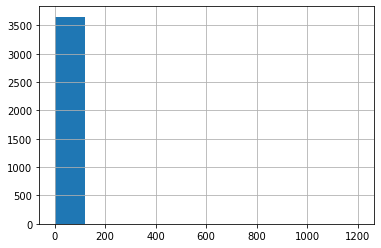

In [23]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count